In [2]:

import matplotlib.pyplot as plt
import pandas as pd

import rlcache.utils.visualiser as viz
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
res_df = pd.DataFrame()
errs_df = pd.DataFrame()

In [80]:
mean_rl, std_rl = viz.calculate_hitrate('results/rl_caching_strategy/cache_capacity_5000/')
res_df['rlcache'] = mean_rl
errs_df['rlcache'] = std_rl

In [140]:
res_df

,rlcache,write_always
write_ratio,,
0,0.474762,0.474417
5,0.390665,0.376347
10,0.346741,0.311918
25,0.238763,0.199701
50,0.113306,0.105049
100,0.000000,0.000000


In [51]:
mean_simple, std_simple  = viz.calculate_hitrate('results/simple_strategy/cache_capacity_5000/')
res_df['write_always'] =  mean_simple
errs_df['write_always'] = std_simple

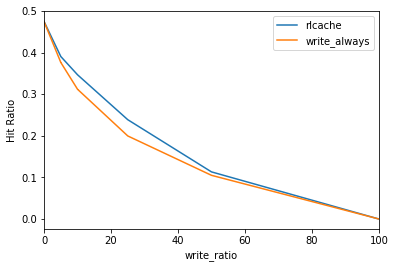

In [112]:

viz.plot_hitrate(res_df, errs_df)
errs_df = errs_df.fillna(0)

In [119]:
res = viz.calculate_hitrate_on_varying_capacity('results/simple_strategy')


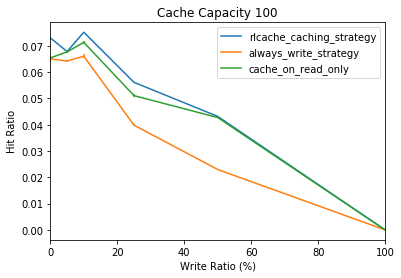

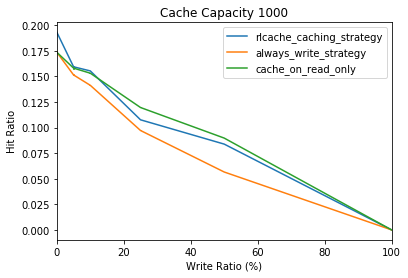

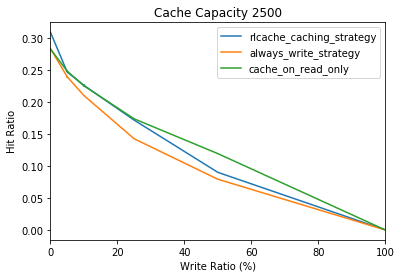

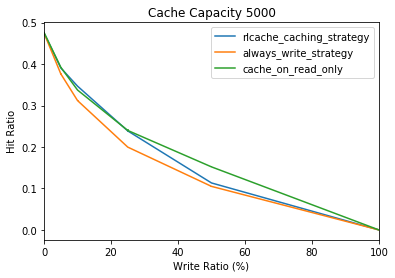

In [132]:
viz.save_everything_hit_rate('results',
                             ['rl_caching_strategy', 
                              'simple_strategy',
                              # 'random_caching',
                              'simple_strategy_read_only'
                              ],
                             'plots/caching_strategy',
                             overwrite_cols={
                                 'rl_caching_strategy': 'rlcache_caching_strategy',
                                 'simple_strategy': 'always_write_strategy',
                                 'random_caching': 'random_agent',
                                'simple_strategy_read_only': 'cache_on_read_only'
                             })

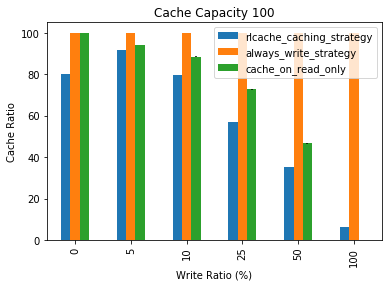

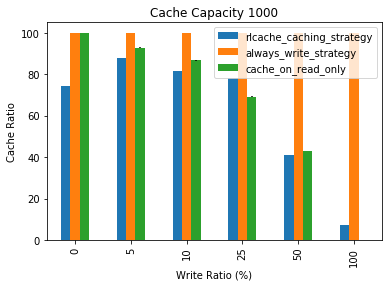

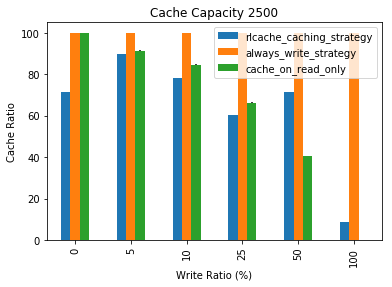

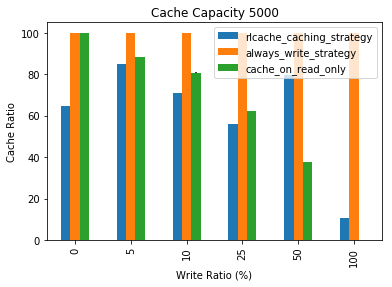

In [133]:

viz.save_everything_cache_rate('results',
                             ['rl_caching_strategy', 
                              'simple_strategy',
                              # 'random_caching',
                              'simple_strategy_read_only'
                              ],
                             'plots/caching_strategy',
                             overwrite_cols={
                                 'rl_caching_strategy': 'rlcache_caching_strategy',
                                 'simple_strategy': 'always_write_strategy',
                                 'random_caching': 'random_agent',
                                'simple_strategy_read_only': 'cache_on_read_only'
                             })


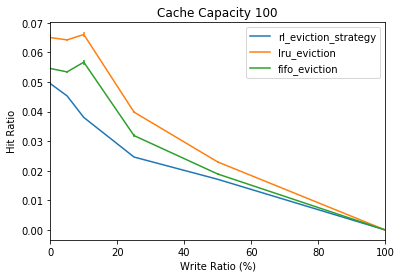

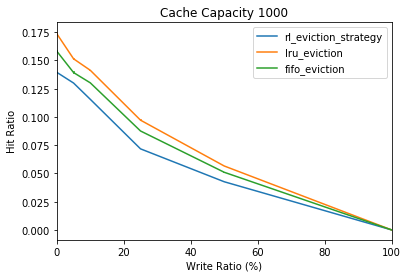

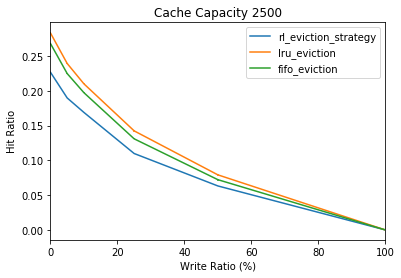

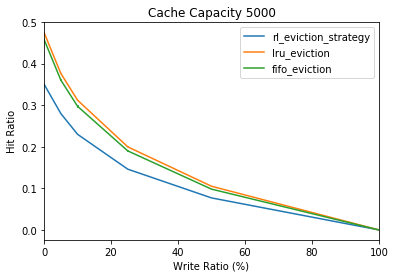

In [147]:

viz.save_everything_hit_rate('results',
                             ['rl_eviction_strategy', 
                              'simple_strategy',
                              'simple_strategy_fifo'],
                             'plots/eviction_strategy',
                             overwrite_cols={'simple_strategy': 'lru_eviction', 
                                             'simple_strategy_fifo': 'fifo_eviction'})

In [155]:

stats_df = pd.read_csv(f'results/rl_caching_strategy/cache_capacity_5000/2019_05_17_12_54/evaluation_logger.log',
                   names=['timestamp', 'key', 'observation', 'episode'],
                   usecols=['episode', 'observation', 'key'])
stats = stats_df.groupby([(stats_df.index // 10000), 'episode', 'observation']).count().unstack(0)['key'].fillna(0).transpose()
# hit_ratio_all = stats['Hit'] / stats.sum(axis=1)
# stats.plot()

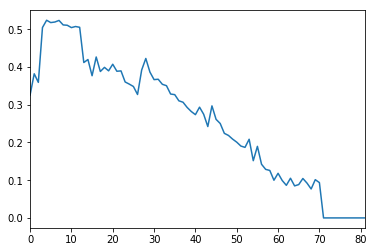

In [205]:
results = (stats[1]['Hit']/stats[1].sum(axis=1))
results = results.fillna((stats[2]['Hit']/stats[2].sum(axis=1)))
results = results.fillna((stats[3]['Hit']/stats[3].sum(axis=1)))
results = results.fillna((stats[4]['Hit']/stats[4].sum(axis=1)))
results = results.fillna((stats[5]['Hit']/stats[5].sum(axis=1)))
results = results.fillna(0)
results.plot()

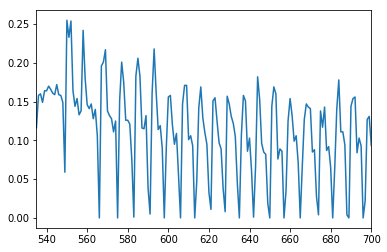

In [273]:
test_learning = stats_df.groupby([(stats_df.index // 1000), 'episode', 'observation']).count().unstack(0)['key'].fillna(0).transpose()
# test_learning.index
(test_learning[5]['Hit']/test_learning[5].sum(axis=1)).dropna().plot()


In [117]:
end_of_episode_stats_df = pd.read_csv(f'results/rl_caching_strategy/cache_capacity_5000/2019_05_17_12_54/end_of_episode_logger.log',
                   names=['timestamp', 
                          'episode_num',
                          'invalidate', 
                          'hit', 
                          'miss', 
                          'hit_ratio', 
                          'should_cache', 
                          'should_not_cache', 
                          'should_cache_ratio', 
                          'manual_evicts', 
                          'cache_utility'])


end_of_episode_stats_df['should_cache'][6] - end_of_episode_stats_df['should_cache'][5] 




10740

In [116]:
end_of_episode_stats_df = pd.read_csv(f'results/random_caching/cache_capacity_5000/2019_05_24_16_42/end_of_episode_logger.log',
                   names=['timestamp', 'episode_num',
                          'invalidate', 'hit', 
                          'miss', 'hit_ratio', 
                          'should_cache', 
                          'should_not_cache', 
                          'should_cache_ratio', 
                          'manual_evicts', 
                          'cache_utility'],
                      usecols=['should_cache', 'should_not_cache'])
end_of_episode_stats_df


,should_cache,should_not_cache
0,0,0
1,19436,19327
2,22582,22466
3,26599,26212
4,33510,33379
5,40494,40434
6,50089,49911


In [207]:
end_of_episode_stats_df

,timestamp,episode_num,invalidate,hit,miss,hit_ratio,should_cache,should_not_cache,should_cache_ratio,manual_evicts,cache_utility
0,2019-05-17 12:55:49,0,0,0,0,0.000000,0,0,0.000000,0,0.0000
1,2019-05-17 13:26:55,1,0,58004,41996,58.004000,27172,14824,64.701400,4553,0.9994
2,2019-05-17 13:59:22,2,0,112269,82565,57.622899,66077,21654,75.317733,27829,0.9996
3,2019-05-17 14:37:38,3,159,159812,125091,56.093477,103350,36838,73.722430,52511,0.9996
4,2019-05-17 15:25:36,4,549,192588,167377,53.501868,141016,66396,67.988352,76027,1.0000
5,2019-05-17 16:19:53,5,930,211250,198456,51.561364,205749,83001,71.255065,109791,0.9296
6,2019-05-17 17:04:58,6,1075,211250,198456,51.561364,216489,172261,55.688489,117356,0.9942


In [255]:
end_of_episode_stats_df_siple = pd.read_csv(f'results/simple_strategy/cache_capacity_5000/2019_05_18_11_15/end_of_episode_logger.log',
                   names=['timestamp', 'episode_num',
                          'invalidate', 'hit', 
                          'miss', 'hit_ratio', 
                          'should_cache', 
                          'should_not_cache', 
                          'should_cache_ratio', 
                          'manual_evicts', 
                          'cache_utility'])

In [210]:

cache_utilisation_df =  pd.read_csv(f'results/simple_strategy/cache_capacity_5000/2019_05_18_11_15/caching_strategy/read_write_caching_strategy_entry_hits_logger.log',
                   names=['timestamp', 'episode_num',
                          'user', 'hit'])

In [239]:
cache_utilisation_df.groupby(['episode_num']).sum()

,hit
episode_num,
1,42870
2,52203
3,47387
4,41074
5,24942
6,8755


In [218]:
cache_utilisation_df_rl =  pd.read_csv(f'results/rl_caching_strategy/cache_capacity_5000/2019_05_17_12_54/caching_strategy/rl_caching_strategy_entry_hits_logger.log',
                   names=['timestamp', 'episode_num',
                          'user', 'hit'])

In [256]:
test = cache_utilisation_df_rl.groupby(['episode_num']).sum().unstack(0)
test['hit']/end_of_episode_stats_df['should_cache']

0         NaN
1    0.609819
2    0.378150
3    0.172143
4    0.082388
5    0.032292
6    0.000000
dtype: float64

In [257]:

test_2  = cache_utilisation_df.groupby(['episode_num']).sum().unstack(0)
test_2['hit']/end_of_episode_stats_df_siple['should_cache']



0         NaN
1    1.152512
2    0.631272
3    0.350939
4    0.203499
5    0.088206
6    0.022873
dtype: float64

In [275]:

viz.calculate_hitrate_on_varying_capacity('results/rl_ttl_strategy')

ValueError: Length mismatch: Expected axis has 7 elements, new values have 6 elements

In [92]:

stats_df = pd.read_csv(f'results/rl_caching_strategy/cache_capacity_5000/2019_05_17_12_54/evaluation_logger.log',
                   names=['timestamp', 'key', 'observation', 'episode'],
                   usecols=['episode', 'observation', 'key'])
# stats = stats_df.groupby(['episode', 'observation', (stats_df.index // 10000)]).count().unstack(0)['key'].fillna(0).transpose()
# hit_ratio_all = stats['Hit'] / stats.sum(axis=1)
stats = stats_df.groupby([(stats_df.index // 1000), 'episode', 'observation']).count().unstack(0)['key'].fillna(0).transpose()


In [15]:

# (stats['Hit'] / 10000).quantile(0.95,axis=1)


episode
1    0.51470
2    0.40325
3    0.36710
4    0.26750
5    0.12725
6    0.00000
Name: 0.95, dtype: float64

In [90]:
stats_df = pd.read_csv(f'results/random_caching/cache_capacity_5000/2019_05_24_16_42/evaluation_logger.log',
                   names=['timestamp', 'key', 'observation', 'episode'],
                   usecols=['episode', 'observation', 'key'])
stats = stats_df.groupby([(stats_df.index // 1000), 'episode', 'observation']).count().unstack(0)['key'].fillna(0).transpose()

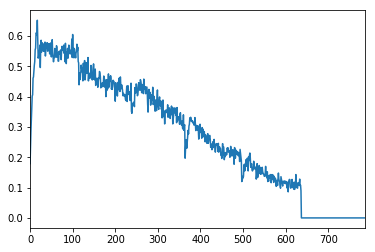

In [91]:


results = (stats[1]['Hit']/stats[1].sum(axis=1))
results = results.fillna((stats[2]['Hit']/stats[2].sum(axis=1)))
results = results.fillna((stats[3]['Hit']/stats[3].sum(axis=1)))
results = results.fillna((stats[4]['Hit']/stats[4].sum(axis=1)))
results = results.fillna((stats[5]['Hit']/stats[5].sum(axis=1)))
results = results.fillna(0)
results.plot()

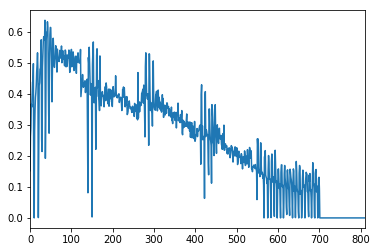

In [93]:

results = (stats[1]['Hit']/stats[1].sum(axis=1))
results = results.fillna((stats[2]['Hit']/stats[2].sum(axis=1)))
results = results.fillna((stats[3]['Hit']/stats[3].sum(axis=1)))
results = results.fillna((stats[4]['Hit']/stats[4].sum(axis=1)))
results = results.fillna((stats[5]['Hit']/stats[5].sum(axis=1)))
results = results.fillna(0)
results.plot()

Text(0.5, 1.0, 'Cache Capacity 5000 learning.')

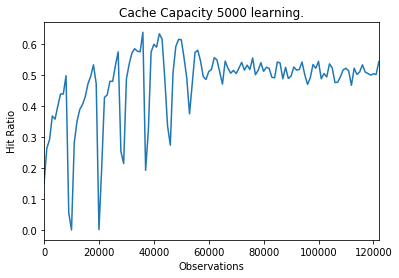

In [88]:

zoomed_stats = (stats[1]['Hit']/stats[1].sum(axis=1)).dropna()
zoomed_stats.index = zoomed_stats.index * 1000
ax = zoomed_stats.plot()
ax.set_xlabel('Observations')
ax.set_ylabel('Hit Ratio')
ax.set_title(f'Cache Capacity 5000 learning.')


In [89]:
fig = ax.get_figure()
fig.savefig(f'plots/caching_strategy/hitrate_zoomed_5000.pdf')
